In [19]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#单个dicom文件和nifit文件都可以通过 ReadImage()来读取

#读取单个DICOM文件
singleDicomPath = 'data/dicom/PATIENT_DICOM/image_37' #虽然没有文件的后缀名，但是是一个dicom文件
sitkImage = sitk.ReadImage(singleDicomPath)
print("单个DICOM文件读取成功，Size为：{}".format(sitkImage.GetSize()))

单个DICOM文件读取成功，Size为：(512, 512, 1)


In [5]:
#读取nifit格式(.nii 或者 .nii.gz)
NifitmPath = 'data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
print("Nifit文件读取成功，Size为：{}".format(sitkImage.GetSize()))

Nifit文件读取成功，Size为：(880, 880, 12)


In [6]:
#dicom文件序列可以通过ImageSeriesReader() 来构建一个序列执行器
dicomsPath = 'data/dicom/PATIENT_DICOM'  #这是dicom文件所在的目录路径
reader = sitk.ImageSeriesReader()
dicomName = reader.GetGDCMSeriesFileNames(dicomsPath)
reader.SetFileNames(dicomName)
sitkImage = reader.Execute()
print("DICOM文件序列读取成功，Size为：{}".format(sitkImage.GetSize()))

DICOM文件序列读取成功，Size为：(512, 512, 151)


In [7]:
#成功读取DICOM序列，现在通过WriteImage()另存为Nifit格式文件。
sitk.WriteImage(sitkImage,'newNifitFile.nii.gz')
#再次读取newNifitFile.nii.gz  看是否和DICOM序列一样的size
NifitmPath = 'newNifitFile.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
print("new Nifit文件读取成功，Size为：{}".format(sitkImage.GetSize()))

new Nifit文件读取成功，Size为：(512, 512, 151)


In [8]:
NifitPath = 'data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitPath)
#查看图像的原点Origin，大小Size，间距Spacing和方向Direction

print("原点位置:{}".format(sitkImage.GetOrigin())) 
print("尺寸：{}".format(sitkImage.GetSize()))
print("体素大小(x,y,z):{}".format(sitkImage.GetSpacing()) )
print("图像方向:{}".format(sitkImage.GetDirection()))

原点位置:(45.438987731933594, -72.11285400390625, -135.62310791015625)
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
图像方向:(-0.0, -0.0422187728553966, -0.9991083902550303, 1.0, -0.0, 0.0, 0.0, 0.9991083901252077, -0.04221876978314502)


In [9]:
#查看图像相关的维度信息
print("维度:{}".format(sitkImage.GetDimension()))
print("宽度:{}".format(sitkImage.GetWidth()))
print("高度:{}".format(sitkImage.GetHeight()))
print("深度(层数):{}".format(sitkImage.GetDepth()))

维度:3
宽度:880
高度:880
深度(层数):12


In [10]:
#数据类型查询
print("数据类型:{}".format(sitkImage.GetPixelIDTypeAsString()))

数据类型:32-bit float


In [11]:
#读取单个DICOM文件
singleDicomPath = 'data/dicom/PATIENT_DICOM/image_37' 
sitkImage = sitk.ReadImage(singleDicomPath)
#循环打印元信息
#0008|0008 是元标签，冒号后面是对应的标签信息。
for key in sitkImage.GetMetaDataKeys():
        print("\"{0}\":\"{1}\"".format(key, sitkImage.GetMetaData(key)))

"0008|0008":"ORIGINAL\PRIMARY "
"0008|0016":"1.2.840.10008.5.1.4.1.1.2"
"0008|0018":"1.2.826.0.1.3680043.2.1125.5884314988606237504306616505098661470"
"0008|0020":"20090527"
"0008|0022":"20090527"
"0008|0030":"125545"
"0008|0032":"125545"
"0008|0050":""
"0008|0060":"CT"
"0008|0080":"IRCAD"
"0008|0090":""
"0010|0010":"liver_07^patient"
"0010|0020":""
"0010|0030":"20090527"
"0010|0040":"M"
"0018|0050":"1.6000000238418579"
"0018|0088":"1.6000000238418579"
"0020|000d":"1.2.826.0.1.3680043.2.1125.1018312207988658057996027752780424811"
"0020|000e":"1.2.826.0.1.3680043.2.1125.8633402857074894243605226200524012175"
"0020|0010":""
"0020|0011":""
"0020|0013":"37"
"0020|0032":"0\0\59.2000008821487"
"0020|0037":"1\0\0\0\1\0 "
"0028|0002":"1"
"0028|0004":"MONOCHROME2 "
"0028|0010":"512"
"0028|0011":"512"
"0028|0030":"0.782000005245209\0.782000005245209"
"0028|0100":"16"
"0028|0101":"16"
"0028|0102":"15"
"0028|0103":"1"
"0028|1050":"0"
"0028|1051":"0"
"0028|1052":"0 "
"0028|1053":"1 "
"0028|1055":""

In [12]:
def print_info(sitkImage):
    print("原点位置:{}".format(sitkImage.GetOrigin())) 
    print("尺寸：{}".format(sitkImage.GetSize()))
    print("体素大小(x,y,z):{}".format(sitkImage.GetSpacing()) )
    print("图像方向:{}".format(sitkImage.GetDirection()))
    print("维度:{}".format(sitkImage.GetDimension()))
    print("宽度:{}".format(sitkImage.GetWidth()))
    print("高度:{}".format(sitkImage.GetHeight()))
    print("深度(层数):{}".format(sitkImage.GetDepth()))
    print("数据类型:{}".format(sitkImage.GetPixelIDTypeAsString()))
    print()

#创建图像 3D sitkImage
image3D = sitk.Image((512,512,30),sitk.sitkInt16)
print_info(image3D)

原点位置:(0.0, 0.0, 0.0)
尺寸：(512, 512, 30)
体素大小(x,y,z):(1.0, 1.0, 1.0)
图像方向:(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
维度:3
宽度:512
高度:512
深度(层数):30
数据类型:16-bit signed integer



In [13]:
#创建图像 2D sitkImage
image2D = sitk.Image((512,512),sitk.sitkInt16)
print_info(image2D)

原点位置:(0.0, 0.0)
尺寸：(512, 512)
体素大小(x,y,z):(1.0, 1.0)
图像方向:(1.0, 0.0, 0.0, 1.0)
维度:2
宽度:512
高度:512
深度(层数):0
数据类型:16-bit signed integer



In [14]:
#创建图像  RGB sitkImage
imageRGB= sitk.Image((512,512),sitk.sitkVectorUInt8, 3)
print_info(imageRGB)

原点位置:(0.0, 0.0)
尺寸：(512, 512)
体素大小(x,y,z):(1.0, 1.0)
图像方向:(1.0, 0.0, 0.0, 1.0)
维度:2
宽度:512
高度:512
深度(层数):0
数据类型:vector of 8-bit unsigned integer



In [15]:
print("创建一个3D SimpleITK图像")
sitkImage = sitk.Image([200,100,50], sitk.sitkUInt16)

创建一个3D SimpleITK图像


In [16]:
#3D SimpleITK 转 Numpy
print("3D SimpleITK 转 Numpy")
npImage = sitk.GetArrayFromImage(sitkImage)
print("打印转换前sitkImage的Size(x,y,z):{}".format(sitkImage.GetSize()))
print("打印转换后npImage的Size(z,y,x):{}".format(npImage.shape))

3D SimpleITK 转 Numpy
打印转换前sitkImage的Size(x,y,z):(200, 100, 50)
打印转换后npImage的Size(z,y,x):(50, 100, 200)


In [17]:
print("Numpy 转 SimpleITK")
sitkImage = sitk.GetImageFromArray(npImage)
print("打印转换前npImage的Size(z,y,x):{}".format(npImage.shape))
print("打印转换后sitkImage的Size(x,y,z):{}".format(sitkImage.GetSize()))

Numpy 转 SimpleITK
打印转换前npImage的Size(z,y,x):(50, 100, 200)
打印转换后sitkImage的Size(x,y,z):(200, 100, 50)


In [18]:
print("创建一个 RGB SimpleITK图像")
sitkImage= sitk.Image((512,512),sitk.sitkVectorUInt8, 3)

#RGB SimpleITK 转 Numpy
print("RGB SimpleITK 转 Numpy【注意size的变化】")
npImage = sitk.GetArrayFromImage(sitkImage)
print("打印转换前sitkImage的Size(x,y,z):{}".format(sitkImage.GetSize()))
print("打印转换后npImage的Size(z,y,x):{}".format(npImage.shape))
print()
print("Numpy 转 SimpleITK")
sitkImage = sitk.GetImageFromArray(npImage)
print("打印转换前npImage的Size(z,y,x):{}".format(npImage.shape))
print("打印转换后sitkImage的Size(x,y,z):{}".format(sitkImage.GetSize()))

创建一个 RGB SimpleITK图像
RGB SimpleITK 转 Numpy【注意size的变化】
打印转换前sitkImage的Size(x,y,z):(512, 512)
打印转换后npImage的Size(z,y,x):(512, 512, 3)

Numpy 转 SimpleITK
打印转换前npImage的Size(z,y,x):(512, 512, 3)
打印转换后sitkImage的Size(x,y,z):(3, 512, 512)


In [20]:
#读取CT并展示
#dicom文件序列可以通过ImageSeriesReader() 来构建一个序列执行器
dicomsPath = 'data/dicom/PATIENT_DICOM'  #这是dicom文件所在的目录路径
reader = sitk.ImageSeriesReader()
dicomName = reader.GetGDCMSeriesFileNames(dicomsPath)
reader.SetFileNames(dicomName)
sitkImage = reader.Execute()

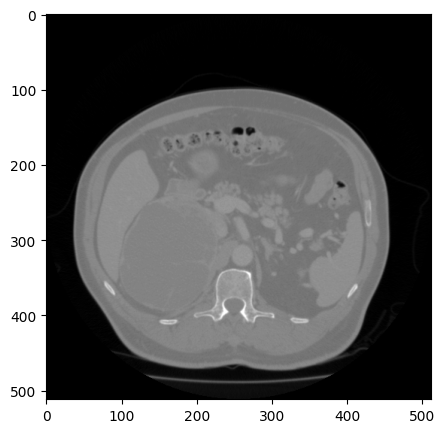

In [21]:
z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

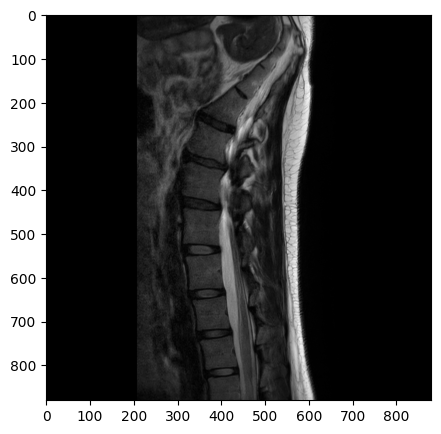

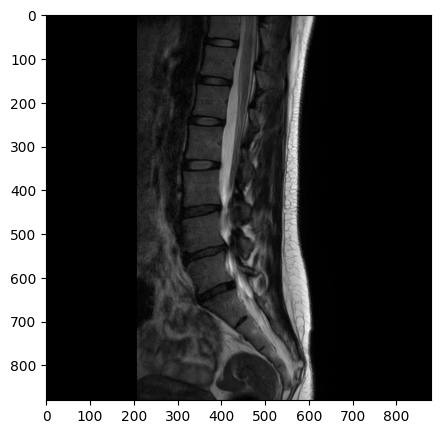

In [22]:
"""
有些医学图像用matplotlib 显示的时候会出现上下翻转的情况，但是用ITK——SNAP打开显示却是正常。
可能是matplotlib的显示原点不同的关系。遇到这个中期，就通过强制翻转一下。
"""
#读取MR图像
NifitmPath = 'data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)

z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

slice = np.flipud(slice)
plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

In [23]:
"""
设置窗宽窗位，并且发现像素值已经缩放到[0~255]之间
"""

#读取CT并展示
#dicom文件序列可以通过ImageSeriesReader() 来构建一个序列执行器
dicomsPath = 'data/dicom/PATIENT_DICOM'  #这是dicom文件所在的目录路径
reader = sitk.ImageSeriesReader()
dicomName = reader.GetGDCMSeriesFileNames(dicomsPath)
reader.SetFileNames(dicomName)
sitkImage = reader.Execute()

z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
print("没有调节窗口窗位之前CT值的范围为{}~{}".format(np.min(slice),np.max(slice)))

没有调节窗口窗位之前CT值的范围为-1023~1024


In [24]:
#设置窗宽窗位，设置窗宽窗位的同时会把图像缩放到【0~255】之间
#由于是增强期肝脏，所有窗位可以设置高一点
#IntensityWindowingImageFilter即可进行窗宽窗位的调节
wincenter = 80
winwidth = 250
min = int(wincenter - winwidth/2.0)
max = int(wincenter + winwidth/2.0)

intensityWindow = sitk.IntensityWindowingImageFilter()
intensityWindow.SetWindowMaximum(max)
intensityWindow.SetWindowMinimum(min)
sitkImage = intensityWindow.Execute(sitkImage)

slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
print("调节窗口窗位之后CT值的范围位为{}~{}".format(np.min(slice),np.max(slice)))

调节窗口窗位之后CT值的范围位为0~255


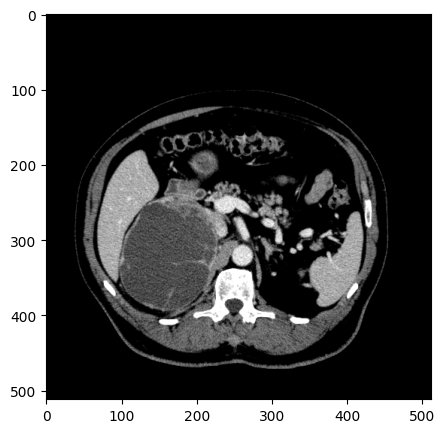

In [25]:
plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

In [26]:
"""
把像素值已经缩放到[0~255]之间，但是不调节窗口窗位
"""
#读取CT并展示
#dicom文件序列可以通过ImageSeriesReader() 来构建一个序列执行器
dicomsPath = 'data/dicom/PATIENT_DICOM'  #这是dicom文件所在的目录路径
reader = sitk.ImageSeriesReader()
dicomName = reader.GetGDCMSeriesFileNames(dicomsPath)
reader.SetFileNames(dicomName)
sitkImage = reader.Execute()

z = int(sitkImage.GetSize()[2]/2)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
print("没有缩放之前CT值的范围为{}~{}".format(np.min(slice),np.max(slice)))

没有缩放之前CT值的范围为-1023~1024


缩放之后CT值的范围位为0~255


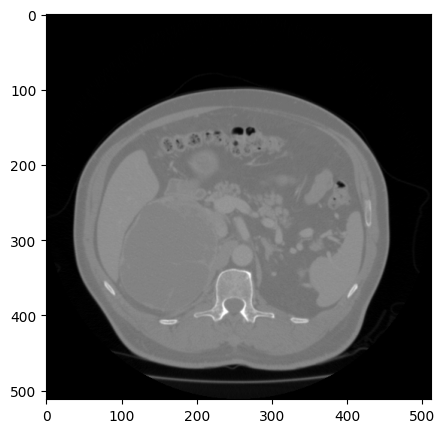

In [27]:
#通过RescaleIntensity方法既可以进行缩放
sitkImage = sitk.RescaleIntensity(sitkImage)
slice = sitk.GetArrayFromImage(sitkImage)[z,:,:]
print("缩放之后CT值的范围位为{}~{}".format(np.min(slice),np.max(slice)))

plt.figure(figsize=(5,5))
plt.imshow(slice, 'gray')
plt.show()

In [28]:
"""
统一Spacing
由于x轴和y轴的Spcing由小变大，x轴和y轴的size就变小。
z轴的Spacing由大变小，z轴的size就变大
"""
def resampleSpacing(sitkImage, newspace=(1,1,1)):
    euler3d = sitk.Euler3DTransform()
    xsize, ysize, zsize = sitkImage.GetSize()
    xspacing, yspacing, zspacing = sitkImage.GetSpacing()
    origin = sitkImage.GetOrigin()
    direction = sitkImage.GetDirection()
    #新的X轴的Size = 旧X轴的Size *（原X轴的Spacing / 新设定的Spacing）
    new_size = (int(xsize*xspacing/newspace[0]),int(ysize*yspacing/newspace[1]),int(zsize*zspacing/newspace[2]))
    #如果是对标签进行重采样，模式使用最近邻插值，避免增加不必要的像素值
    sitkImage = sitk.Resample(sitkImage,new_size,euler3d,sitk.sitkNearestNeighbor,origin,newspace,direction)
    return sitkImage

#读取nifit原数据 ，size为：(880, 880, 12)
NifitmPath = 'data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
print("重采样前的信息") 
print("尺寸：{}".format(sitkImage.GetSize()))
print("体素大小(x,y,z):{}".format(sitkImage.GetSpacing()) )

print('='*30+'我是分割线'+'='*30)

newResample = resampleSpacing(sitkImage, newspace=[1,1,1])
print("重采样后的信息")
print("尺寸：{}".format(newResample.GetSize()))
print("体素大小(x,y,z):{}".format(newResample.GetSpacing()) )

重采样前的信息
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
==============================我是分割线==============================
重采样后的信息
尺寸：(303, 303, 65)
体素大小(x,y,z):(1.0, 1.0, 1.0)


In [30]:
"""
统一Size
X轴和Y轴的Size和Spacing没有变化，
Z轴的Size和Spacing有变化
"""
def resampleSize(sitkImage, depth):
    #重采样函数
    euler3d = sitk.Euler3DTransform()

    xsize, ysize, zsize = sitkImage.GetSize()
    xspacing, yspacing, zspacing = sitkImage.GetSpacing()
    new_spacing_z = zspacing/(depth/float(zsize))

    origin = sitkImage.GetOrigin()
    direction = sitkImage.GetDirection()
    #根据新的spacing 计算新的size
    newsize = (xsize,ysize,int(zsize*zspacing/new_spacing_z))
    newspace = (xspacing, yspacing, new_spacing_z)
    sitkImage = sitk.Resample(sitkImage,newsize,euler3d,sitk.sitkNearestNeighbor,origin,newspace,direction)
    return sitkImage

DEPTH = 16  #需要重采样Size的层数

#读取nifit原数据 ，size为：(880, 880, 12)
NifitmPath = 'data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)
print("重采样前的信息") 
print("尺寸：{}".format(sitkImage.GetSize()))
print("体素大小(x,y,z):{}".format(sitkImage.GetSpacing()) )

print('='*30+'我是分割线'+'='*30)


newsitkImage = resampleSize(sitkImage, depth=DEPTH)
print("重采样后的信息")
print("尺寸：{}".format(newsitkImage.GetSize()))
print("体素大小(x,y,z):{}".format(newsitkImage.GetSpacing()) )

重采样前的信息
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
==============================我是分割线==============================
重采样后的信息
尺寸：(880, 880, 16)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 4.124998569488525)


In [31]:
#读取nifit原数据 ，size为：(880, 880, 12)
NifitmPath = 'data/nifit/Case14.nii.gz'
sitkImage = sitk.ReadImage(NifitmPath)

#创建numpy 的数据 ，假设这个是模型预测的文件，shape为：(880, 880, 12)
npMask = np.zeros((12,880,880), np.float32)

#现在把预测numpy数据转换成和原nifit数据一致的信息，数据类型是sitkUInt8
#先转换成sitkImage
sitkMask = sitk.GetImageFromArray(npMask)
#转换数据类型
sitkMask = sitk.Cast(sitkMask, sitk.sitkUInt8)


#方式一
#手动设置
sitkMask.SetSpacing(sitkImage.GetSpacing()) #设置spacing
sitkMask.SetOrigin(sitkImage.GetOrigin()) #设置 origin
sitkMask.SetDirection(sitkImage.GetDirection())  #设置方向
#打印两者的信息，除了数据类型，其他都一致
print_info(sitkMask)
print_info(sitkImage)
print('='*30+'我是分割线'+'='*30)

#方式二
#调用CopyInformation即可
sitkMask.CopyInformation(sitkImage)
#打印两者的信息，除了数据类型，其他都一致
print_info(sitkMask)
print_info(sitkImage)

#最后把预测的mask文件保存成NiFit数据即可
sitk.WriteImage(sitkMask,'predictMask.nii.gz')

原点位置:(45.438987731933594, -72.11285400390625, -135.62310791015625)
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
图像方向:(-0.0, -0.0422187728553966, -0.9991083902550303, 1.0, -0.0, 0.0, 0.0, 0.9991083901252077, -0.04221876978314502)
维度:3
宽度:880
高度:880
深度(层数):12
数据类型:8-bit unsigned integer

原点位置:(45.438987731933594, -72.11285400390625, -135.62310791015625)
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
图像方向:(-0.0, -0.0422187728553966, -0.9991083902550303, 1.0, -0.0, 0.0, 0.0, 0.9991083901252077, -0.04221876978314502)
维度:3
宽度:880
高度:880
深度(层数):12
数据类型:32-bit float

==============================我是分割线==============================
原点位置:(45.438987731933594, -72.11285400390625, -135.62310791015625)
尺寸：(880, 880, 12)
体素大小(x,y,z):(0.3448275923728943, 0.3448275923728943, 5.499998092651367)
图像方向:(-0.0, -0.0422187728553966, -0.9991083902550303, 1.0, -0.0, 0.0, 0.0, 0.9991083901252077, -0.04221876978314502)
维度:3
宽

In [35]:
import os
import random
from random import shuffle
import re
import cv2

In [36]:
path_origin = 'train/MR'
path_mask = 'train/Mask'
files = list(filter(lambda x: x.endswith('.nii.gz'), os.listdir(path_origin)))

In [43]:
random.shuffle(files)

In [56]:
rate = int(len(files) * 0.8)  # 训练集和测试集8：2
train_txt = open('train/train_list.txt', 'w')
val_txt = open('train/val_list.txt', 'w')
size =list()

In [57]:
for i, f in enumerate(files):
    data_path = os.path.join(path_origin, f)
    mask_name = 'mask_' + f.lower()
    mask_path = os.path.join(path_mask, mask_name)
    # 提取路径中的数字
#     print(re.findall(r"\d+\.?\d*", data_path))
    number = re.findall(r"\d+\.?\d*", data_path)[0].split('.')[0]
#     print(number)
#     break
    if i < rate:
        train_txt.write(data_path + ' ' + mask_path+ '\n')
    else:
        val_txt.write(data_path + ' ' + mask_path+ '\n')
#     break

In [58]:
print("一共有病例数{}例".format(str(i)))
train_txt.close()
val_txt.close()
print('完成')

一共有病例数171例
完成
